In [1]:
import torch 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json
from matplotlib.ticker import FuncFormatter

In [2]:
seq_seed_list = range(10, 20)
T = 300
epoch = list(range(T)) * len(seq_seed_list)

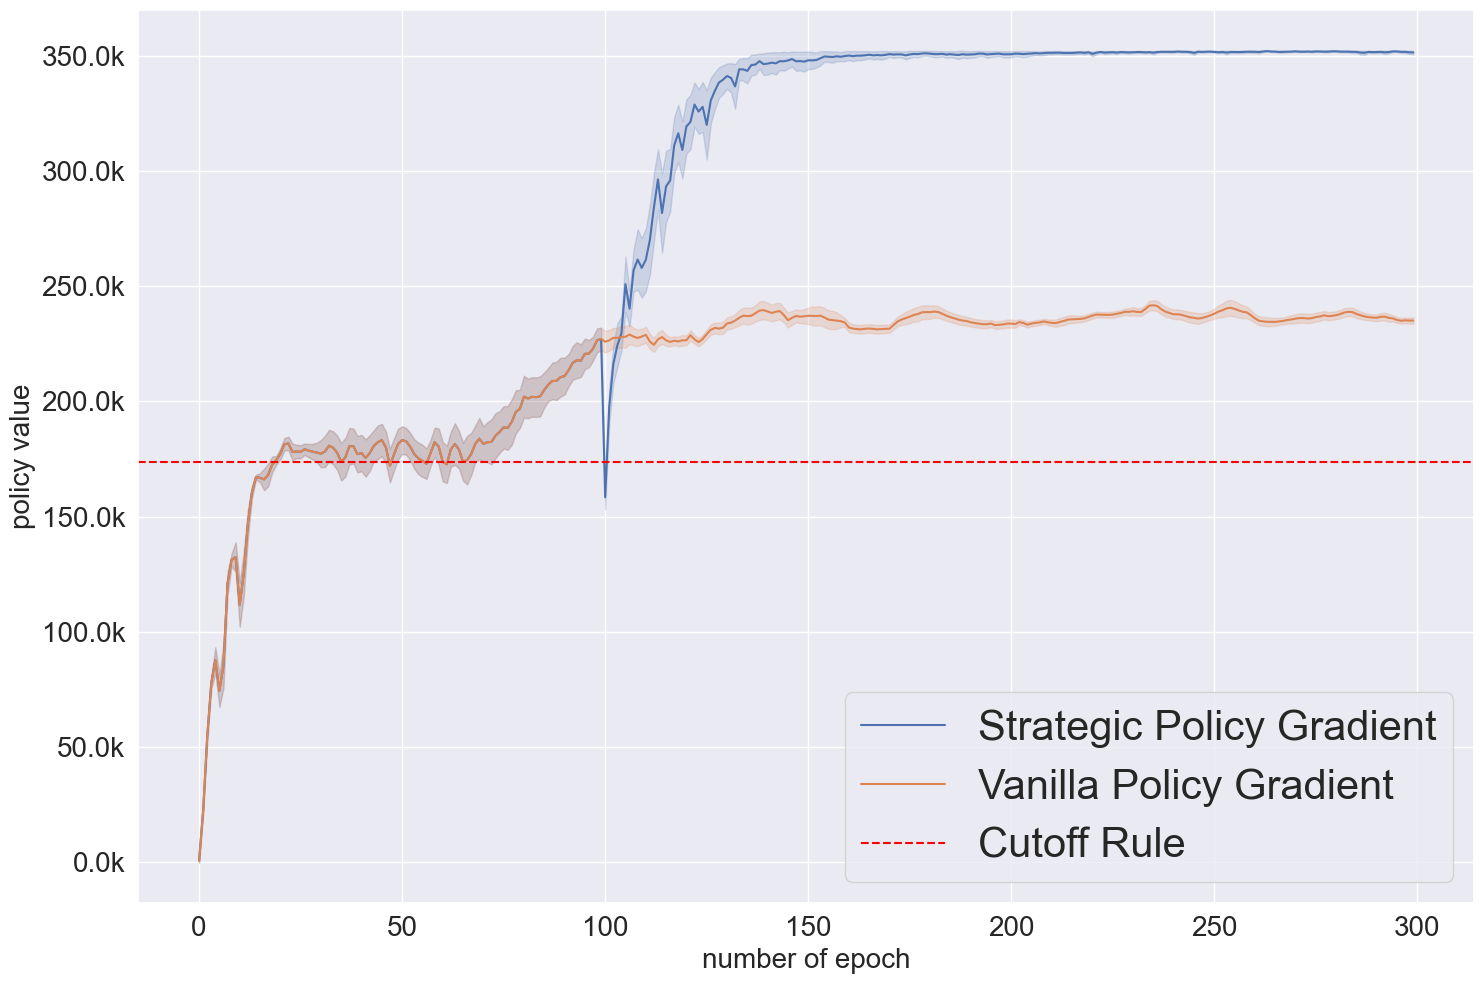

In [3]:
cost_coef = 0.1

with open('result/strategicGD_nov_{}.json'.format(cost_coef), 'r') as file:
    value_strategicGD = json.load(file)  
    
with open('result/vanillaGD_{}.json'.format(cost_coef), 'r') as file:
    value_vanillaGD = json.load(file)  
    
df = pd.DataFrame({'epoch': epoch, 'value_strategicGD': value_strategicGD, 'value_vanillaGD': value_vanillaGD})


def mul_100(x, pos):
    return f'{x*100}k'

plt.figure(figsize=(15, 10))

sns.lineplot(data = df, x = 'epoch', y = 'value_strategicGD', label='Strategic Policy Gradient',  errorbar=('se', 1))
sns.lineplot(data = df, x = 'epoch', y = 'value_vanillaGD', label='Vanilla Policy Gradient', errorbar=('se', 1))
plt.axhline(y=1.738, color='red', linestyle='--', label='Cutoff Rule')

plt.gca().yaxis.set_major_formatter(FuncFormatter(mul_100))
plt.xlabel("number of epoch", fontsize=20)
plt.ylabel("policy value", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.tight_layout()
plt.savefig('imgs/semi-performance_c{}.pdf'.format(cost_coef))
plt.show()


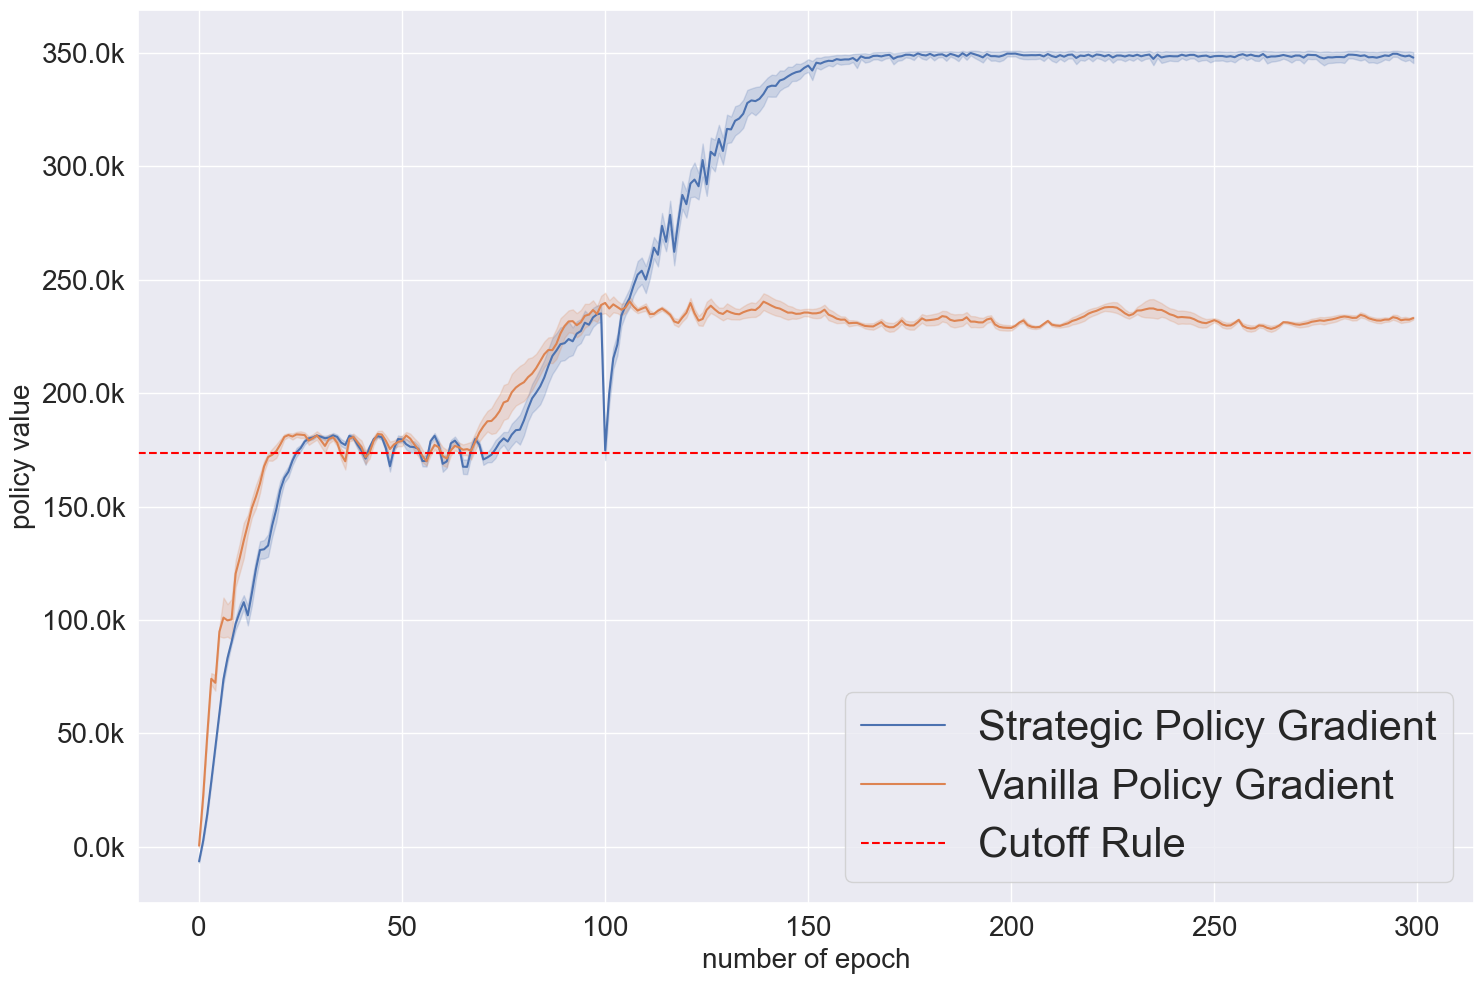

In [4]:
cost_coef = 0.15

with open('result/strategicGD_nov_{}.json'.format(cost_coef), 'r') as file:
    value_strategicGD = json.load(file)  
    
with open('result/vanillaGD_{}.json'.format(cost_coef), 'r') as file:
    value_vanillaGD = json.load(file)[-len(epoch):] 
    
df = pd.DataFrame({'epoch': epoch, 'value_strategicGD': value_strategicGD, 'value_vanillaGD': value_vanillaGD})


def mul_100(x, pos):
    return f'{x*100}k'

plt.figure(figsize=(15, 10))

sns.lineplot(data = df, x = 'epoch', y = 'value_strategicGD', label='Strategic Policy Gradient',  errorbar=('se', 1))
sns.lineplot(data = df, x = 'epoch', y = 'value_vanillaGD', label='Vanilla Policy Gradient', errorbar=('se', 1))
plt.axhline(y=1.738, color='red', linestyle='--', label='Cutoff Rule')

plt.gca().yaxis.set_major_formatter(FuncFormatter(mul_100))
plt.xlabel("number of epoch", fontsize=20)
plt.ylabel("policy value", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.tight_layout()
plt.savefig('imgs/semi-performance_c{}.pdf'.format(cost_coef))
plt.show()


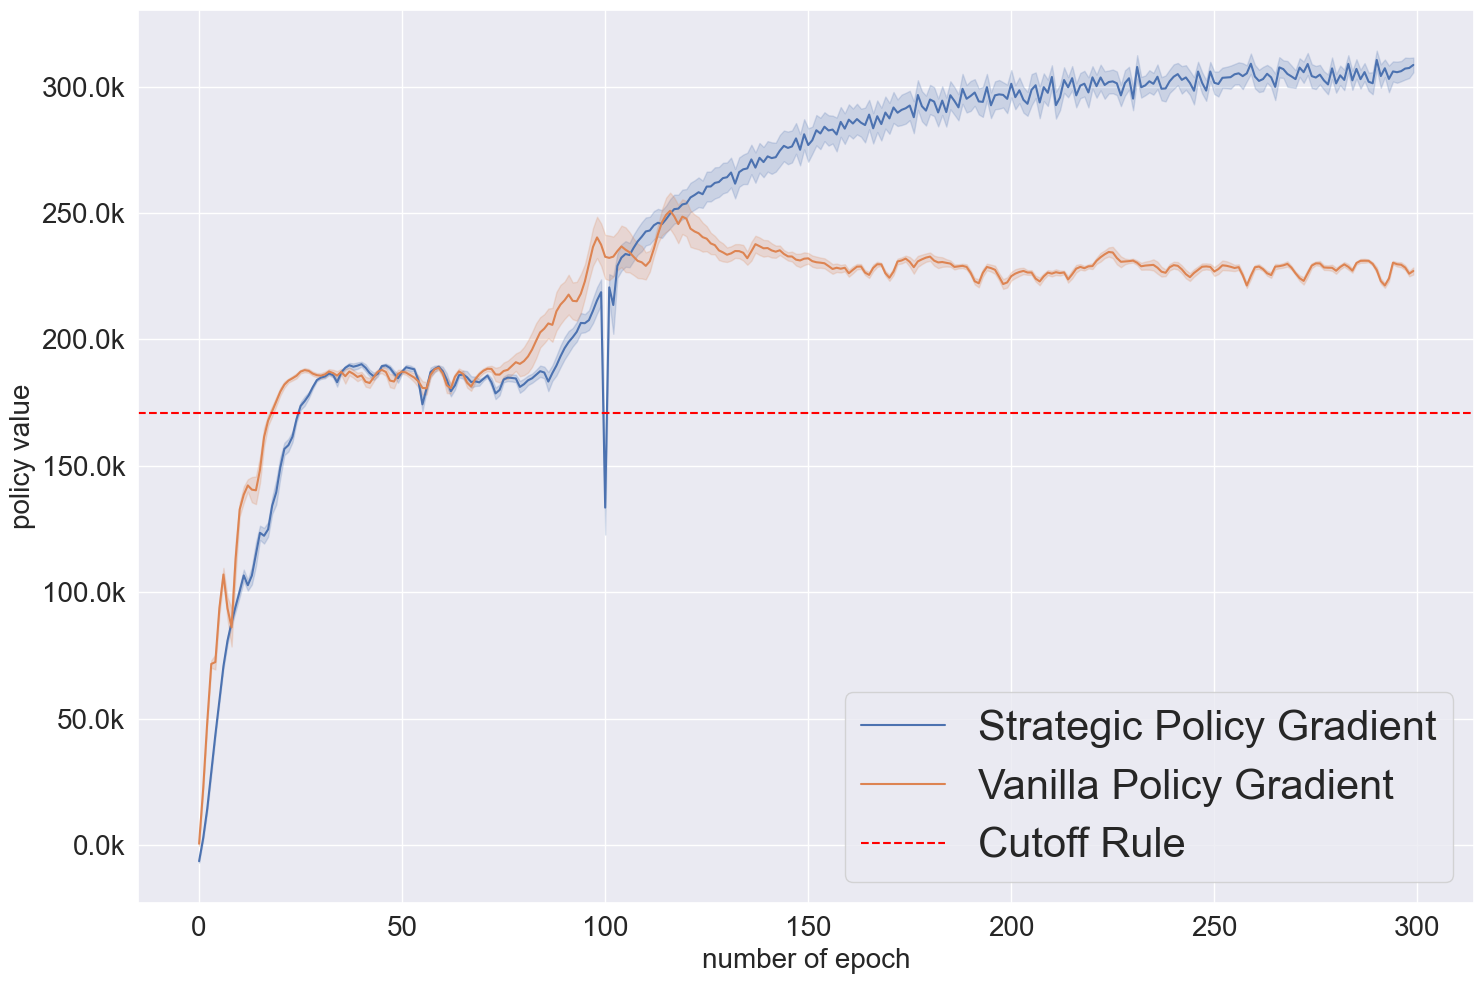

In [5]:
cost_coef = 0.2

with open('result/strategicGD_nov_{}.json'.format(cost_coef), 'r') as file:
    value_strategicGD = json.load(file)  
    
with open('result/vanillaGD_{}.json'.format(cost_coef), 'r') as file:
    value_vanillaGD = json.load(file)[-len(epoch):]  
    
df = pd.DataFrame({'epoch': epoch, 'value_strategicGD': value_strategicGD, 'value_vanillaGD': value_vanillaGD})

def mul_100(x, pos):
    return f'{x*100}k'

plt.figure(figsize=(15, 10))

sns.lineplot(data = df, x = 'epoch', y = 'value_strategicGD', label='Strategic Policy Gradient',  errorbar=('se', 1))
sns.lineplot(data = df, x = 'epoch', y = 'value_vanillaGD', label='Vanilla Policy Gradient', errorbar=('se', 1))

plt.axhline(y=1.71, color='red', linestyle='--', label='Cutoff Rule')

plt.gca().yaxis.set_major_formatter(FuncFormatter(mul_100))
plt.xlabel("number of epoch", fontsize=20)
plt.ylabel("policy value", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.tight_layout()
plt.savefig('imgs/semi-performance_c{}.pdf'.format(cost_coef))
plt.show()


# Distplot of U before/after manipulation

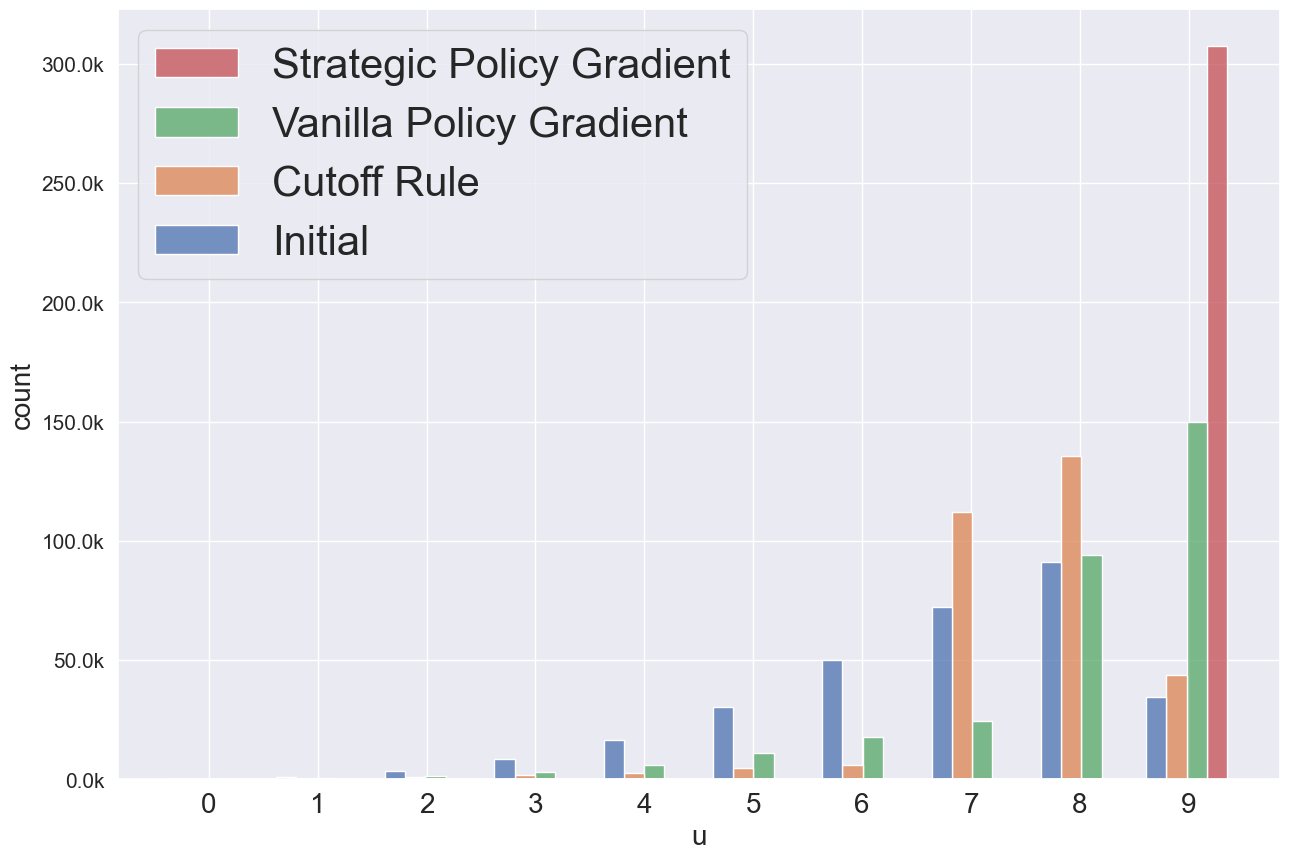

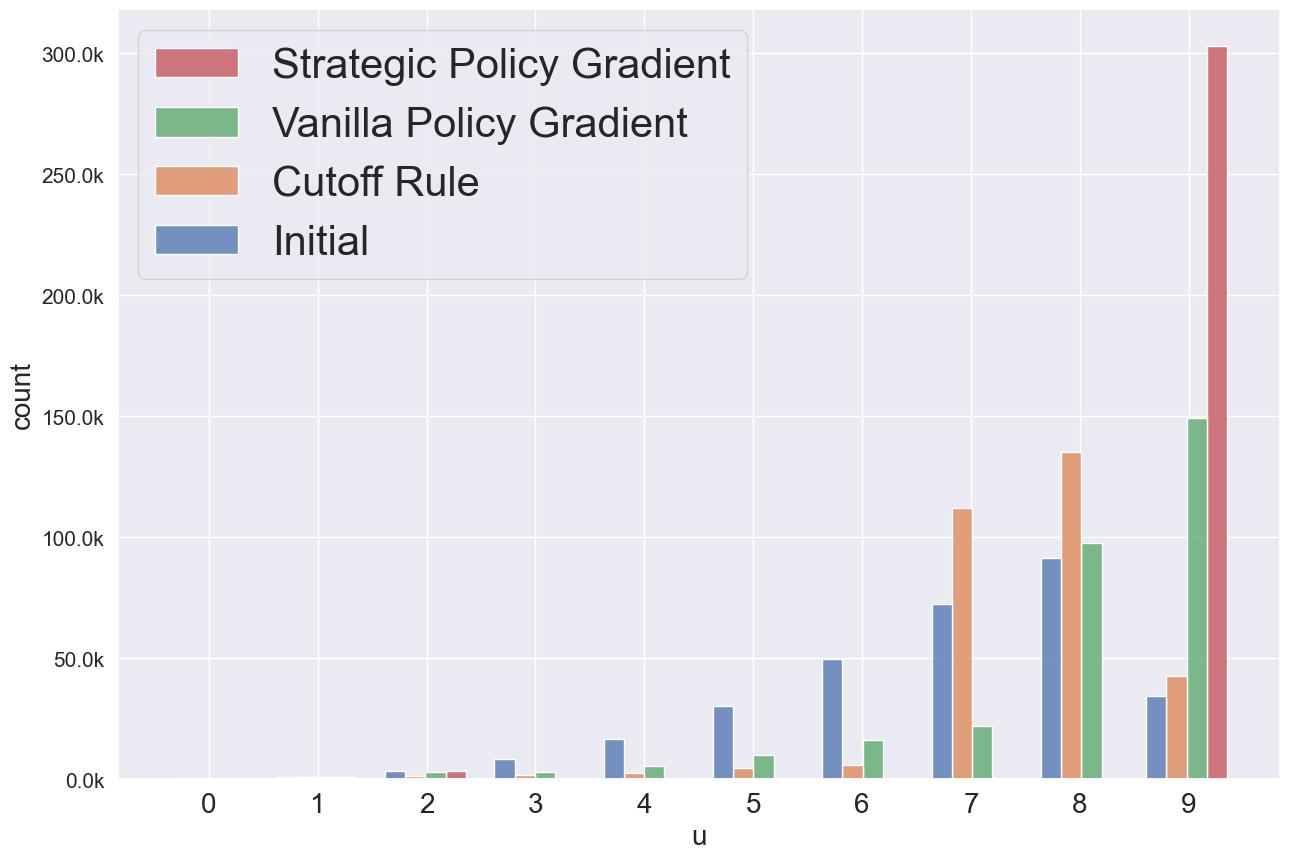

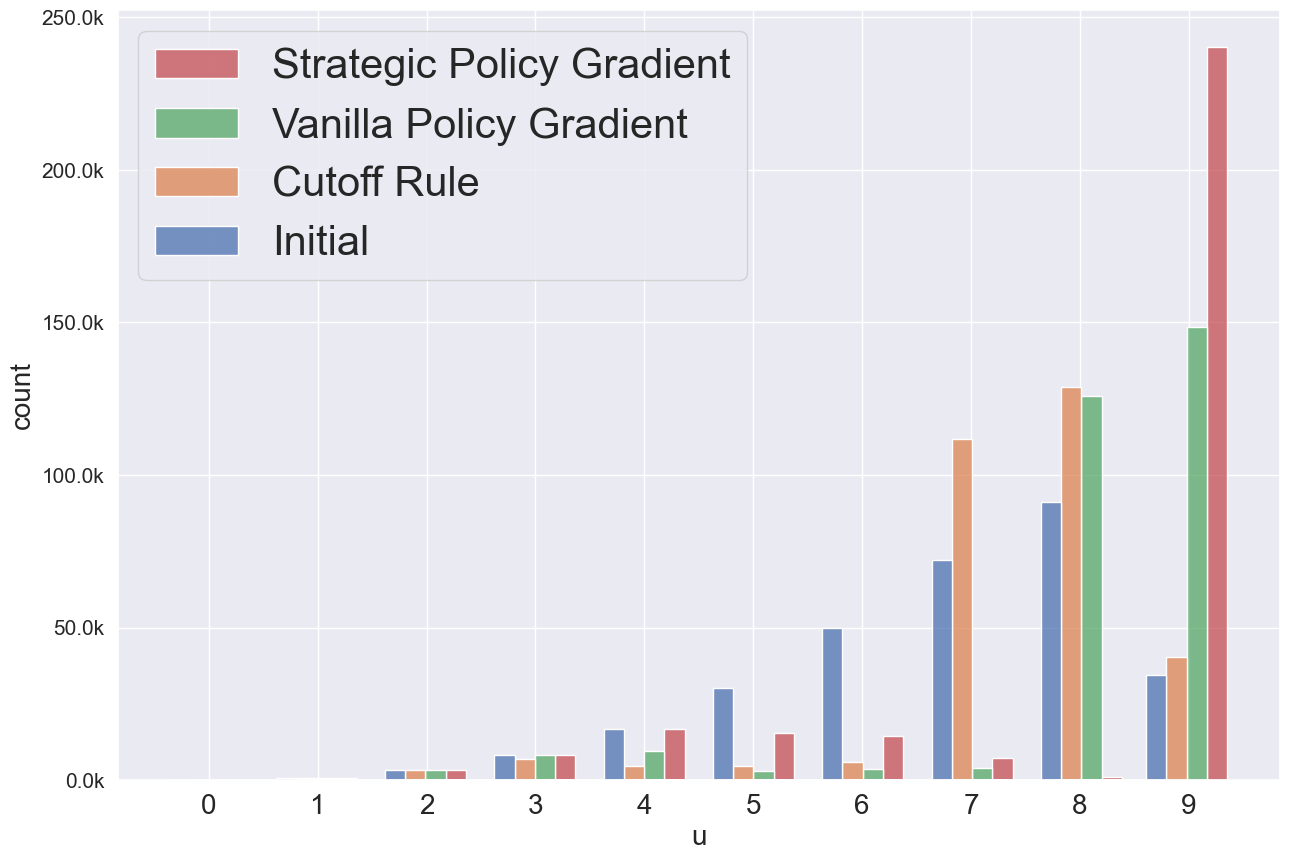

In [6]:
def trans_thous(x, pos):
    return f'{x/1000}k'

legend_labels = ["Strategic Policy Gradient", "Vanilla Policy Gradient", "Cutoff Rule", "Initial"]




for cost_coef in [0.1, 0.15, 0.2]:
    u_df = pd.read_csv("result/plot_u_df_c{}.csv".format(cost_coef))
    
    plt.figure(figsize=(15, 10))
    ax = sns.histplot(data = u_df, x = "u", hue = "method", multiple="dodge", stat="count", shrink = 20, )
    plt.gca().yaxis.set_major_formatter(FuncFormatter(trans_thous))
    
    # Add the custom legend
    plt.legend(labels=legend_labels, fontsize=30)
    plt.xlabel("u", fontsize=20)
    plt.xticks(ticks = range(10), fontsize=20)
    plt.ylabel("count", fontsize=20)
    plt.yticks(fontsize=15)

    plt.savefig("imgs/semi-u_distribution_c{}.pdf".format(cost_coef))